# PIVOT & UNPIVOT

## PIVOT

```
WITH PivotData AS
(
    SELECT <grouping column>
        , <spreading column>
        , <aggregation column>
    FROM <source table>
)
SELECT <grouping column>, <distinct spreading values>
FROM PivotData
    PIVOT (<aggregation function>(<aggregation column>)
        FOR <spreading column> IN <distinct spreading values>));
```

## UNPIVOT

```
SELECT <grouping column>, <target names column>, <target values column>
FROM <pivoted source table>
    UNPIVOT(<target values column> FOR <target names column> IN (<distinct spreading values>));
```

![PIVOT and UNPIVOT in T-SQL](https://3.bp.blogspot.com/-615cePAJbQk/XJqL-XQlV0I/AAAAAAAAAeo/dxyWTy-vKqEhyhH1YGwFCDN10QHLLJm2QCLcBGAs/s1600/pivot%2Band%2Bunpivot.png)

[https://docs.microsoft.com/en-us/sql/t-sql/queries/from-using-pivot-and-unpivot?view=sql-server-ver15](https://docs.microsoft.com/en-us/sql/t-sql/queries/from-using-pivot-and-unpivot?view=sql-server-ver15)

## Beispiel 1:

## 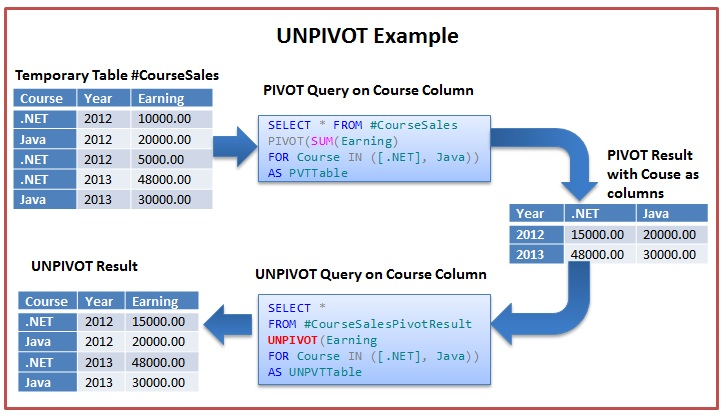

Quelle: [https://9saireddy.blogspot.com/2017/06/pivot-and-unpivot.html](https://9saireddy.blogspot.com/2017/06/pivot-and-unpivot.html)

### **<u>Vorbereitung</u>**

In [6]:
USE MASTER
GO
DROP DATABASE IF EXISTS PIVOT_UNPIVOT1
GO
CREATE DATABASE PIVOT_UNPIVOT1
GO
USE PIVOT_UNPIVOT1
GO


CREATE TABLE [dbo].[CourseSales]
(Course VARCHAR(50),Year INT,Earning  MONEY)
GO
--Populate Sample records
INSERT INTO [dbo].[CourseSales] VALUES('.NET',2012,10000)
INSERT INTO [dbo].[CourseSales] VALUES('Java',2012,20000)
INSERT INTO [dbo].[CourseSales] VALUES('.NET',2012,5000)
INSERT INTO [dbo].[CourseSales] VALUES('.NET',2013,48000)
INSERT INTO [dbo].[CourseSales] VALUES('Java',2013,30000)
INSERT INTO [dbo].[CourseSales] VALUES('R',2012,148000)
INSERT INTO [dbo].[CourseSales] VALUES('R',2013,130000)
GO

select * from [dbo].[CourseSales]

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(7 rows affected)

Total execution time: 00:00:00.257

Course,Year,Earning
.NET,2012,"10000,0000"
Java,2012,"20000,0000"
.NET,2012,"5000,0000"
.NET,2013,"48000,0000"
Java,2013,"30000,0000"
R,2012,"148000,0000"
R,2013,"130000,0000"


![Table to be Pivoted in Sql](https://lh5.googleusercontent.com/proxy/pnFxckpVCv9QW23n-rIErhyxGmdoM3w7c75JrlB_WEuQ0tXt3ey7AL4uCDHzbTzSgb3jUtjBvcfafeqoULDhAByoJZIyg6Ef8DF1jL_qoM28LSZ6L0jHl3woYfL2ze42CQ=s0-d)

## PIVOT

![Pivot Example 1 In Sql Server](https://lh5.googleusercontent.com/proxy/h5ssrVZshEMbt4BMledIA0X0I-FmdTQptHZvNo9AI0658UVgDitPojObE5YStArI4gmJZoY9MsxAazsDX5_1tFRjfRg2vi04FlGtHNwfJNd89LgiBZ3x8KJI5uQQEtLw03i2bw=s0-d)

In [7]:
select * from [dbo].[CourseSales]
pivot
    (
        sum(earning) 
        --for course in ([.net],[Java])
        for course in ([.net],[Java],[R])
    ) as PIVOTTABLE

(2 rows affected)

Total execution time: 00:00:00.040

Year,.net,Java,R
2012,"15000,0000","20000,0000","148000,0000"
2013,"48000,0000","30000,0000","130000,0000"


![Pivot Example 2 In Sql Server](https://lh5.googleusercontent.com/proxy/hFS7YZiejGM3L-dh3iZ6_c6vjlCslFg7FJGN7xwj9p9pofSEU0HlAPI42AUVa-vAw-LswYMp2jIaEakDXZUPOealmmVqgL14G8YwS0SbTUBiCCDT-IfPsCeoqO2Mj5V02ZNglQ=s0-d)

In [8]:
SELECT * FROM [dbo].[CourseSales]
PIVOT
    (
    SUM(Earning) 
    FOR Year IN ([2012],[2013])
    ) AS PVTTable

(3 rows affected)

Total execution time: 00:00:00.030

Course,2012,2013
.NET,"15000,0000","48000,0000"
Java,"20000,0000","30000,0000"
R,"148000,0000","130000,0000"


## UNPIVOT

![UNPIVOT Example in Sql Server](https://lh4.googleusercontent.com/proxy/gACjBzPnCusjjGo_pokmrkTKktXeaqzYZVHv1sz0jGzBYGohXbW-JprovGo7u5WfM0W7wNpXmh85tamP_UiGfYN_fp_NLkKY4WLnEs9X0AFTGfUzl5OZhVGox0UwSoIfy91p5Q=s0-d)

In [9]:
DROP TABLE IF EXISTS [dbo].[CourseSales_Pivot]

Select * from [dbo].[CourseSales]

select * 
into [dbo].[CourseSales_Pivot]
from [dbo].[CourseSales]
pivot
    (
        sum(earning) 
        for course in ([.net],[Java])
    ) as PIVOTTABLE

Select * from [dbo].[CourseSales_Pivot]

--UNPIVOT the [dbo].[CourseSales_Pivot] table data on the Course column    



SELECT Course, Year, Earning FROM [dbo].[CourseSales_Pivot]
UNPIVOT
    (
        Earning
        FOR Course IN ([.NET], Java)
    ) AS UNPVTTable

(7 rows affected)

(2 rows affected)

(2 rows affected)

(4 rows affected)

Total execution time: 00:00:00.034

Course,Year,Earning
.NET,2012,"10000,0000"
Java,2012,"20000,0000"
.NET,2012,"5000,0000"
.NET,2013,"48000,0000"
Java,2013,"30000,0000"
R,2012,"148000,0000"
R,2013,"130000,0000"


Year,.net,Java
2012,"15000,0000","20000,0000"
2013,"48000,0000","30000,0000"


Course,Year,Earning
.net,2012,"15000,0000"
Java,2012,"20000,0000"
.net,2013,"48000,0000"
Java,2013,"30000,0000"
